In [1]:
import numpy as np
from shapely.geometry import Point, LineString, Polygon, GeometryCollection, MultiLineString
from shapely.ops import split, linemerge, polygonize, unary_union
import matplotlib.pyplot as plt
from tqdm import tqdm

In [36]:
poly = Polygon([(0, 0), (2, 0), (1, 1)])

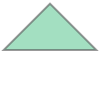

In [37]:
poly

In [48]:
result = split(split(poly, LineString([(1, 0), (1, 2)])), LineString([(0, 0.5), (2, 0.5)]))

ValueError: Splitting GeometryCollection geometry is not supported

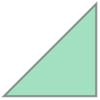

In [43]:
result[0]

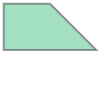

In [53]:
split(result[1], LineString([(0, 0.5), (2, 0.5)]))[1]

In [58]:
split(Point(1, 1).buffer(1.0), LineString([(0, 0.5), (2, 0.5)]))[1].area

0.6124924636669753

In [283]:
def getNumLine(p):
    return len(p.exterior.coords.xy[1]) - 1

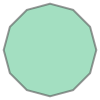

In [74]:
Point(1, 1).buffer(1, resolution = 3)

In [181]:
pieces = [Point(0, 0).buffer(1, resolution = 100)]

In [2]:
def getRandomLine():
    angle1 = np.random.rand() * 2 * np.pi
    angle2 = np.random.rand() * 2 * np.pi
    return LineString([(np.cos(angle1), np.sin(angle1)), (np.cos(angle2), np.sin(angle2))])

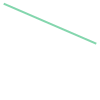

In [201]:
results = []
line = getRandomLine()
line

In [202]:
for p in pieces:
    result = split(p, line)
    results += result
pieces = results

In [203]:
len(pieces)

7

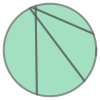

In [204]:
GeometryCollection(pieces)

In [200]:
pieces[0].area

0.0005951100631488707

In [215]:
def cut(pieces):
    results = []
    line = getRandomLine()
    for p in pieces:
        if intersect(p, line):
            result = split(p, line)
            results += result
    return results

In [263]:
pieces = [Point(0, 0).buffer(1, resolution = 10000)]
for i in tqdm(range(100)):
    pieces = cut(pieces)

100%|████████████████████| 100/100 [00:34<00:00,  2.87it/s]


In [264]:
len(pieces)

1919

In [265]:
GeometryCollection(pieces)

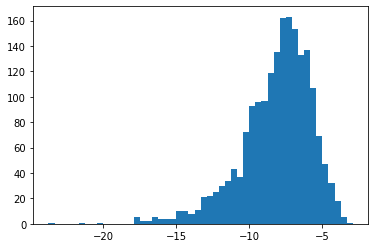

In [266]:
plt.hist([np.log(p.area) for p in pieces], bins=50)
plt.show()

In [273]:
count = dict()
for i in [getNumLine(p) for p in pieces]:
    count[i] = 0 if i not in count else count[i] + 1

In [278]:
count[6]

307

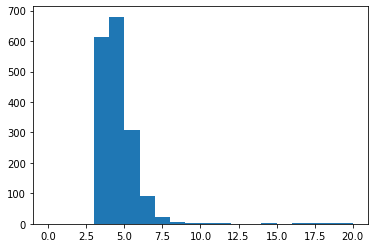

In [285]:
plt.hist([getNumLine(p) for p in pieces], range=(0, 20), bins=20)
plt.show()

In [235]:
p = pieces[6]

In [3]:
def getAllPoints(poly):
    x, y = poly.exterior.coords.xy
    return list(zip(x, y))

In [244]:
line = getRandomLine()
line.coords[0], line.coords[1]

((-0.5554624137953729, -0.8315416446941295),
 (0.7438373182619415, 0.6683607139568296))

In [253]:
def getEquation(line):
    p1, p2 = line.coords[0], line.coords[1]
    a = (p1[1] - p2[1]) / (p1[0] - p2[0])
    b = p1[1] - p1[0] * a
    return a, b

def cal(a, b, p):
    return 1 if p[1] - a * p[0] - b < 0 else -1

In [249]:
getEquation(line)

(1.15439287921349, -0.19031978953801398)

In [252]:
def intersect(poly, line):
    a, b = getEquation(line)
    points = getAllPoints(poly)
    result = cal(a, b, points[0])
    for i in range(1, len(points)):
        if result * cal(a, b, points[i]) < 0:
            return True
    return False

In [306]:
type(linemerge(MultiLineString([getRandomLine(), getRandomLine()])))

shapely.geometry.multilinestring.MultiLineString

In [4]:
def cutCircle(n_iters = 100, resolution = 10000):
    lines = [getRandomLine() for _ in range(n_iters)]
    circle = Point(0, 0).buffer(1, resolution = resolution)
    points = getAllPoints(circle)
    lines.append(LineString(points))
    line = linemerge(MultiLineString(lines))
    print("created lines")
    return list(polygonize(unary_union(line)))

In [5]:
pieces = cutCircle(n_iters = 3000)
print("# of pieces:", len(pieces))

created lines
# of pieces: 1501577


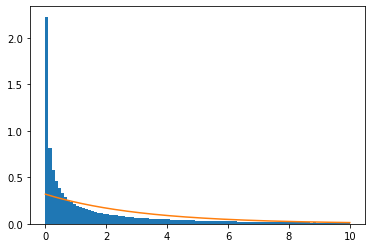

In [107]:
plt.hist(np.array([p.area for p in pieces])*len(pieces), bins=100, range=(0,10), density=True)
lam = 1/np.pi
x = np.linspace(0, 10, 1000000)
y = lam * np.e ** (-lam * x)
plt.plot(x, y)
plt.show()

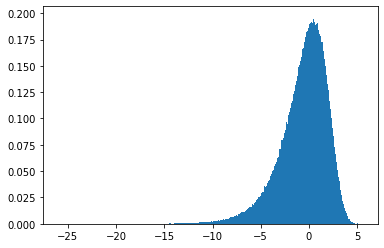

In [123]:
plt.hist([np.log(p.area * len(pieces)) for p in pieces], bins=1000, density=True)
plt.show()

In [111]:
np.mean(np.array([p.area for p in pieces]) * len(pieces))

3.141592640670512

In [145]:
lam = np.pi ** (1/2)

In [146]:
def area(a, b, c):
    s = (a + b + c) / 2
    return np.sqrt(s * (s-a) * (s-b) * (s-c))

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


nan


C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


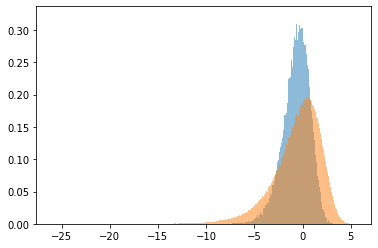

In [147]:
data = [area(np.random.exponential(lam), np.random.exponential(lam), np.random.exponential(lam)) for _ in range(1000000)]
print(np.mean(data))
plt.hist(np.log(data), bins=1000, density=True, alpha = 0.5)
plt.hist([np.log(p.area * len(pieces)) for p in pieces], bins=1000, density=True, alpha = 0.5)
plt.show()

3.1403807318697075


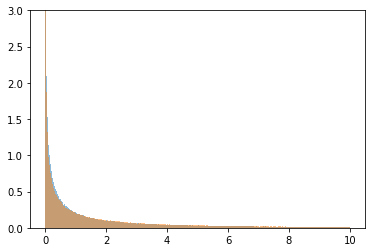

In [143]:
data = [np.random.exponential(lam) * np.random.exponential(lam) * np.random.exponential(lam) for _ in range(1000000)]
print(np.mean(data))
plt.hist(data, bins=1000, density=True, alpha = 0.5, range=(0, 10))
plt.hist([p.area * len(pieces) for p in pieces], bins=1000, density=True, alpha = 0.5, range=(0, 10))
plt.gca().set_ylim(0, 3)
plt.show()

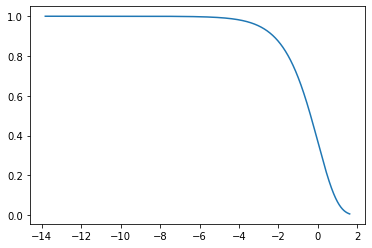

In [59]:
lam = 1
x = np.linspace(0.000001, 5, 1000000)
y = lam * np.e ** (-lam * x)
plt.plot(np.log(x), y)